# Experiment 24

Analysis of Phantom data from March 27, 2024

Measured B fields:

- Center (water): 123.23057 Mhz
- Fat: -0.000410 Mhz

In [11]:
print(1 / 410 * 1000)

t0 = 3.41
t1 = 4.55
t2 = 5.68
print(t2 - t0)

t0 = 3.14
print(t0 + (2.439 /2) )
print(t0 + (2.439) )



2.4390243902439024
2.2699999999999996
4.359500000000001
5.579000000000001


In [2]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP

In [3]:
path = get_project_path()
M = dataset.load_dataset12a(path)
M.shape

Path: /Users/michael/projects/imperial/GASP/notebooks/experiments/../../gasp/../data/20240327_GASP_PHANTOM/dixon/
Loading files: ['meas_MID141_gre_TE4p55_FID60989.dat', 'meas_MID142_gre_TE5p68_FID60990.dat', 'meas_MID140_gre_TE3p41_FID60988.dat']
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6


Software version: VB


(128, 128, 8, 3)

In [4]:
M0 = M[:,:,:,0]
M1 = M[:,:,:,1]
M2 = M[:,:,:,2]

field_map = np.angle(np.conjugate(M0) * M2)
f = np.exp(-1j * field_map / 2)
Mw = M0 + M1
Mf = M0 - M1
Mw3 = M0 + M1 * np.exp(-1j * field_map / 2)
Mf3 = M0 - M1 * np.exp(-1j * field_map / 2)

Mw = np.sqrt(np.sum(np.abs(Mw)**2, axis=2))
Mf = np.sqrt(np.sum(np.abs(Mf)**2, axis=2))
Mw3 = np.sqrt(np.sum(np.abs(Mw3)**2, axis=2))
Mf3 = np.sqrt(np.sum(np.abs(Mf3)**2, axis=2))

[]

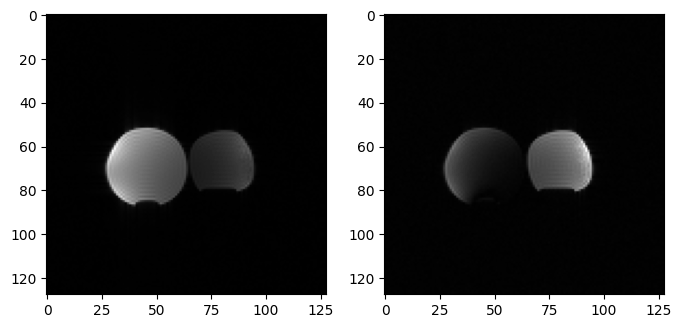

In [5]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(np.abs(Mw3), cmap='gray')
ax2.imshow(np.abs(Mf3), cmap='gray')
plt.plot()